In [50]:
import nltk
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist


import string
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

PATH = "/home/youcs/Documents/git/Sentiment_Test/data/Movie_Review/"
TRAIN = "train.tsv"



############### Helper functions ###############

def load_data(path,file):
    try:
        df = pd.read_csv(path+file)
    except:
        df = pd.read_table(path+file)
    return df

def tokenize(phrases):
    tokens = [text_to_word_sequence(x) for x in df.Phrase]
    tokens = [i for x in tokens for i in x]
    return tokens

def remove_stopwords(tokens):
    return [x for x in tokens if x not in stopwords.words('english')]

def token_lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lem_tokens = []
    for word in tokens:
        pos = 'a'
        if word[1].startswith('VB'):
            pos = 'v'
        elif word[1].startswith('NN'):
            pos = 'n'
        lem_tokens.append(lemmatizer.lemmatize(word[0],pos))
    return lem_tokens

'''
0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive
plot count
'''

# ax = sns.countplot(x="Sentiment", data=df)

In [2]:
df = load_data(PATH,TRAIN)

In [3]:
tokens = tokenize(df.Phrase)

In [5]:
count = FreqDist(tokens)

In [9]:
count

FreqDist({'the': 51633, 'a': 45066, 'of': 32702, 'and': 32177, 'to': 22761, 'it': 18785, "'s": 16971, 'in': 14006, 'is': 13476, 'that': 12338, ...})

In [12]:
tokens_stop = remove_stopwords(tokens)

In [13]:
tokens_stop

['series',
 'escapade',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'also',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amount',
 'much',
 'story',
 'series',
 'escapade',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'series',
 'series',
 'escapade',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'escapade',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'escapade',
 'demonstrating',
 'adage',
 'good',
 'goose',
 'demonstrating',
 'adage',
 'demonstrating',
 'adage',
 'adage',
 'good',
 'goose',
 'good',
 'goose',
 'good',
 'goose',
 'good',
 'goose',
 'good',
 'goose',
 'goose',
 'goose',
 'also',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amount',
 'much',
 'story',
 'also',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amount',
 'much',
 'story',
 'also',
 'also',
 'good',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amount',
 'much',
 'story',
 'gander',
 'occasionally',
 'amuses',
 'none',
 'amount',
 'much',
 'story',
 'ga

In [17]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [19]:
sns.set(style='darkgrid')

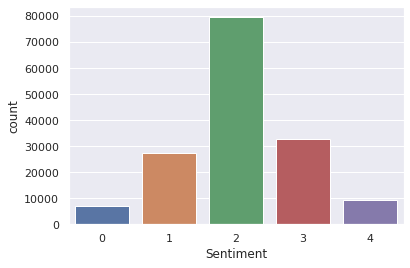

In [51]:
tokens

['a',
 'series',
 'of',
 'escapade',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'is',
 'also',
 'good',
 'for',
 'the',
 'gander',
 'some',
 'of',
 'which',
 'occasionally',
 'amuses',
 'but',
 'none',
 'of',
 'which',
 'amount',
 'to',
 'much',
 'of',
 'a',
 'story',
 'a',
 'series',
 'of',
 'escapade',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'a',
 'series',
 'a',
 'series',
 'of',
 'escapade',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'of',
 'escapade',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'escapade',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'demonstrating',
 'the',
 'adage',
 'demonstrating',
 'the',
 'adage',
 'the',
 'adage',
 'that',
 'what',
 'is',
 'good',
 'for',
 'the',
 'goose',
 'that',
 'what',
 

In [53]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/youcs/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [59]:
tags = pos_tag(set(tokens))

In [61]:
[x[1] for x in tags]

['JJ',
 'NN',
 'NN',
 'IN',
 'VBG',
 'NNS',
 'NN',
 'IN',
 'JJ',
 'NN',
 'VBD',
 'JJ',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'IN',
 'NN',
 'NN',
 'VBD',
 'JJ',
 'NN',
 'NN',
 'RB',
 'JJ',
 'NN',
 'NN',
 'JJ',
 'NN',
 'NN',
 'VBN',
 'JJ',
 'NN',
 'VBD',
 'JJR',
 'JJ',
 'NN',
 'VBG',
 'NN',
 'NN',
 'NN',
 'RB',
 'JJ',
 'NN',
 'RB',
 'VBG',
 'VBG',
 'JJ',
 'NN',
 'NN',
 'NN',
 'VB',
 'JJ',
 'VBG',
 'NN',
 'RB',
 'VBG',
 'JJ',
 'NN',
 'VBZ',
 'JJ',
 'NNS',
 'VBG',
 'NN',
 'NNS',
 'JJ',
 'RB',
 'VBP',
 'VBG',
 'NN',
 'RB',
 'RBR',
 'JJ',
 'VBG',
 'NN',
 'VBD',
 'NN',
 'NN',
 'NN',
 'NN',
 'NNS',
 'VBP',
 'JJ',
 'NN',
 'NN',
 'NN',
 'JJ',
 'NN',
 'JJ',
 'NN',
 'NN',
 'NN',
 'RB',
 'RB',
 'JJ',
 'IN',
 'NN',
 'VBP',
 'JJ',
 'NN',
 'NN',
 'NNS',
 'NN',
 'VBP',
 'NN',
 'NN',
 'NN',
 'VBZ',
 'JJR',
 'NN',
 'VBG',
 'VBN',
 'JJ',
 'NN',
 'NN',
 'NN',
 'NN',
 'VBG',
 'JJ',
 'NN',
 'JJ',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'NN',
 'JJ',
 'NN',
 'NN',
 'NN',
 'NN',
 'JJ',
 'NN',
 'NN',
 'V